In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
teamInfo = pd.read_csv('Teams_Season22.csv')
teamInfo

,Team,TeamName
0,OLY,Olympiacos Piraeus
1,BAR,FC Barcelona
2,MAD,Real Madrid
3,MCO,AS Monaco
4,TEL,Maccabi Playtika Tel Aviv
5,PAR,Partizan Mozzart Bet Belgrade
6,ZAL,Zalgiris Kaunas
7,ULK,Fenerbahce Beko Istanbul
8,BAS,Cazoo Baskonia Vitoria-Gasteiz
9,RED,Crvena Zvezda mts Belgrade


In [3]:
# Importing play by play data 
df = pd.read_csv('PlayByPlay_Season22.csv')
df

,Unnamed: 0,index,TYPE,NUMBEROFPLAY,CODETEAM,PLAYER_ID,PLAYTYPE,PLAYER,TEAM,DORSAL,MINUTE,MARKERTIME,POINTS_A,POINTS_B,COMMENT,PLAYINFO,Game ID,Team_A,Team_B
0,0,0,0,2,,,BP,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,Begin Period,1,MAD,PAN
1,1,1,0,3,MAD,,JB,NaN,Real Madrid,NaN,1,09:59,NaN,NaN,NaN,NaN,1,MAD,PAN
2,2,2,0,4,MAD,P010357,2FGA,"YABUSELE, GUERSCHON",Real Madrid,28.0,1,09:41,NaN,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),1,MAD,PAN
3,3,3,0,5,PAN,P011225,D,"LEE, PARIS",Panathinaikos Athens,5.0,1,09:38,NaN,NaN,NaN,Def Rebound (1),1,MAD,PAN
4,4,4,0,6,MAD,P001392,CM,"CAUSEUR, FABIEN",Real Madrid,1.0,1,09:34,NaN,NaN,NaN,Foul (1),1,MAD,PAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170570,170570,170570,0,487,MAD,PCVM,OUT,"RODRIGUEZ, SERGIO",Real Madrid,13.0,40,00:03,NaN,NaN,NaN,Out,330,NaN,NaN
170571,170571,170571,0,488,MAD,PTGB,OUT,"LLULL, SERGIO",Real Madrid,23.0,40,00:03,NaN,NaN,NaN,Out,330,NaN,NaN
170572,170572,170572,0,489,OLY,P001926,2FGA,"SLOUKAS, KOSTAS",Olympiacos Piraeus,11.0,40,00:02,NaN,NaN,NaN,Missed Two Pointer (1/2 - 6 pt),330,NaN,NaN
170573,170573,170573,0,490,MAD,P007982,D,"WILLIAMS-GOSS, NIGEL",Real Madrid,0.0,40,00:01,NaN,NaN,NaN,Def Rebound (2),330,NaN,NaN


In [4]:
# Drop unnecessary columsn
df = df.loc[:, df.columns[3:]]
df

,NUMBEROFPLAY,CODETEAM,PLAYER_ID,PLAYTYPE,PLAYER,TEAM,DORSAL,MINUTE,MARKERTIME,POINTS_A,POINTS_B,COMMENT,PLAYINFO,Game ID,Team_A,Team_B
0,2,,,BP,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,Begin Period,1,MAD,PAN
1,3,MAD,,JB,NaN,Real Madrid,NaN,1,09:59,NaN,NaN,NaN,NaN,1,MAD,PAN
2,4,MAD,P010357,2FGA,"YABUSELE, GUERSCHON",Real Madrid,28.0,1,09:41,NaN,NaN,NaN,Missed Two Pointer (0/1 - 0 pt),1,MAD,PAN
3,5,PAN,P011225,D,"LEE, PARIS",Panathinaikos Athens,5.0,1,09:38,NaN,NaN,NaN,Def Rebound (1),1,MAD,PAN
4,6,MAD,P001392,CM,"CAUSEUR, FABIEN",Real Madrid,1.0,1,09:34,NaN,NaN,NaN,Foul (1),1,MAD,PAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170570,487,MAD,PCVM,OUT,"RODRIGUEZ, SERGIO",Real Madrid,13.0,40,00:03,NaN,NaN,NaN,Out,330,NaN,NaN
170571,488,MAD,PTGB,OUT,"LLULL, SERGIO",Real Madrid,23.0,40,00:03,NaN,NaN,NaN,Out,330,NaN,NaN
170572,489,OLY,P001926,2FGA,"SLOUKAS, KOSTAS",Olympiacos Piraeus,11.0,40,00:02,NaN,NaN,NaN,Missed Two Pointer (1/2 - 6 pt),330,NaN,NaN
170573,490,MAD,P007982,D,"WILLIAMS-GOSS, NIGEL",Real Madrid,0.0,40,00:01,NaN,NaN,NaN,Def Rebound (2),330,NaN,NaN


In [5]:
Game_Info = df[['Game ID','Team_A','Team_B']].copy()
Game_Info

,Game ID,Team_A,Team_B
0,1,MAD,PAN
1,1,MAD,PAN
2,1,MAD,PAN
3,1,MAD,PAN
4,1,MAD,PAN
...,...,...,...
170570,330,NaN,NaN
170571,330,NaN,NaN
170572,330,NaN,NaN
170573,330,NaN,NaN


In [6]:
Game_Info = Game_Info.dropna().copy()
Game_Info = Game_Info.drop_duplicates().copy()
Game_Info

,Game ID,Team_A,Team_B
0,1,MAD,PAN
511,2,ASV,MIL
1027,3,TEL,ZAL
1572,4,MUN,ULK
2046,5,PAM,BAS
...,...,...,...
168067,325,MAD,PAR
168606,327,MCO,OLY
169109,328,MAD,BAR
169644,329,MCO,BAR


In [7]:
# Eventlist of free throws made, field goals made and asssist to be used to detect assist and related score event
eventList = ['FTM','2FGM','3FGM','AS']

# Filtering only plays in the eventlist
shotsAndAssists = df[df['PLAYTYPE'].isin(eventList)]
shotsAndAssists.drop_duplicates(inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# Shots are kept in the previous plays of the assists. Finding previous plays (shots made of the assists)
shotsAndAssists['prevNUMBEROFPLAY'] = shotsAndAssists['NUMBEROFPLAY'].shift(1)
shotsAndAssists

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NUMBEROFPLAY,CODETEAM,PLAYER_ID,PLAYTYPE,PLAYER,TEAM,DORSAL,MINUTE,MARKERTIME,POINTS_A,POINTS_B,COMMENT,PLAYINFO,Game ID,Team_A,Team_B,prevNUMBEROFPLAY
6,8,PAN,P009006,FTM,"WILLIAMS, DERRICK",Panathinaikos Athens,8.0,1,09:34,1.0,NaN,NaN,Free Throw In (1/1 - 1 pt),1,MAD,PAN,NaN
7,9,PAN,P009006,FTM,"WILLIAMS, DERRICK",Panathinaikos Athens,8.0,1,09:34,2.0,NaN,NaN,Free Throw In (2/2 - 2 pt),1,MAD,PAN,8.0
11,13,MAD,P009005,FTM,"DECK, GABRIEL",Real Madrid,14.0,1,09:14,2.0,1.0,NaN,Free Throw In (1/2 - 1 pt),1,MAD,PAN,9.0
16,19,MAD,P010357,2FGM,"YABUSELE, GUERSCHON",Real Madrid,28.0,2,08:35,2.0,3.0,NaN,Two Pointer (1/2 - 2 pt),1,MAD,PAN,13.0
20,23,PAN,P011225,FTM,"LEE, PARIS",Panathinaikos Athens,5.0,2,08:19,3.0,3.0,NaN,Free Throw In (1/2 - 1 pt),1,MAD,PAN,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170541,456,OLY,P010612,2FGM,"CANAAN, ISAIAH",Olympiacos Piraeus,3.0,38,02:13,78.0,72.0,NaN,Two Pointer (2/3 - 21 pt),330,NaN,NaN,455.0
170542,457,OLY,P008855,AS,"WALKUP, THOMAS",Olympiacos Piraeus,0.0,38,02:11,NaN,NaN,NaN,Assist (6),330,NaN,NaN,456.0
170543,459,MAD,PCVM,2FGM,"RODRIGUEZ, SERGIO",Real Madrid,13.0,39,01:59,78.0,74.0,NaN,Two Pointer (4/6 - 12 pt),330,NaN,NaN,457.0
170552,469,MAD,PCVM,3FGM,"RODRIGUEZ, SERGIO",Real Madrid,13.0,40,00:46,78.0,77.0,NaN,Three Pointer (2/5 - 15 pt),330,NaN,NaN,459.0


In [9]:
# Keeping only the asssists and their correspondence previous events and renaming them
assists = shotsAndAssists[shotsAndAssists['PLAYTYPE'] == "AS"]
assists.rename(columns = {'prevNUMBEROFPLAY': 'shotEventNumber', 'NUMBEROFPLAY': 'assistEventNumber'}, inplace = True)
assists

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,assistEventNumber,CODETEAM,PLAYER_ID,PLAYTYPE,PLAYER,TEAM,DORSAL,MINUTE,MARKERTIME,POINTS_A,POINTS_B,COMMENT,PLAYINFO,Game ID,Team_A,Team_B,shotEventNumber
38,43,MAD,P006540,AS,"MUSA, DZANAN",Real Madrid,31.0,4,06:56,NaN,NaN,NaN,Assist (1),1,MAD,PAN,42.0
76,83,MAD,PTGB,AS,"LLULL, SERGIO",Real Madrid,23.0,6,04:19,NaN,NaN,NaN,Assist (1),1,MAD,PAN,82.0
78,85,PAN,P004172,AS,"PONITKA, MATEUSZ",Panathinaikos Athens,37.0,6,04:10,NaN,NaN,NaN,Assist (1),1,MAD,PAN,84.0
117,126,PAN,P011248,AS,"ANDREWS, ANDREW",Panathinaikos Athens,12.0,8,02:09,NaN,NaN,NaN,Assist (1),1,MAD,PAN,125.0
121,131,PAN,P003240,AS,"BOCHORIDIS, ELEFTHERIOS",Panathinaikos Athens,7.0,9,01:40,NaN,NaN,NaN,Assist (1),1,MAD,PAN,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170491,399,MAD,P005791,AS,"TAVARES, WALTER",Real Madrid,22.0,33,07:53,NaN,NaN,NaN,Assist (2),330,NaN,NaN,398.0
170501,411,MAD,PCVM,AS,"RODRIGUEZ, SERGIO",Real Madrid,13.0,34,06:25,NaN,NaN,NaN,Assist (8),330,NaN,NaN,410.0
170503,413,OLY,P001926,AS,"SLOUKAS, KOSTAS",Olympiacos Piraeus,11.0,34,06:00,NaN,NaN,NaN,Assist (3),330,NaN,NaN,412.0
170540,455,MAD,PCVM,AS,"RODRIGUEZ, SERGIO",Real Madrid,13.0,38,02:39,NaN,NaN,NaN,Assist (9),330,NaN,NaN,454.0


In [10]:
# Keep relevant columns
shotsMadeList = assists[['Game ID','shotEventNumber','assistEventNumber']]
shotsMadeList

,Game ID,shotEventNumber,assistEventNumber
38,1,42.0,43
76,1,82.0,83
78,1,84.0,85
117,1,125.0,126
121,1,130.0,131
...,...,...,...
170491,330,398.0,399
170501,330,410.0,411
170503,330,412.0,413
170540,330,454.0,455


In [11]:
# Merging the shots df with the whole ply by play data to get the relevant information
shotsMade = pd.merge(df,shotsMadeList, how ='right', left_on = ['Game ID','NUMBEROFPLAY'], right_on = ['Game ID','shotEventNumber'])
shotsMade

,NUMBEROFPLAY,CODETEAM,PLAYER_ID,PLAYTYPE,PLAYER,TEAM,DORSAL,MINUTE,MARKERTIME,POINTS_A,POINTS_B,COMMENT,PLAYINFO,Game ID,Team_A,Team_B,shotEventNumber,assistEventNumber
0,42,MAD,P005791,2FGM,"TAVARES, WALTER",Real Madrid,22.0,4,06:56,5.0,5.0,NaN,Two Pointer (1/1 - 2 pt),1,MAD,PAN,42.0,43
1,82,MAD,P003108,3FGM,"HEZONJA, MARIO",Real Madrid,11.0,6,04:22,9.0,13.0,NaN,Three Pointer (1/1 - 3 pt),1,MAD,PAN,82.0,83
2,84,PAN,P009006,3FGM,"WILLIAMS, DERRICK",Panathinaikos Athens,8.0,6,04:12,12.0,13.0,NaN,Three Pointer (1/1 - 5 pt),1,MAD,PAN,84.0,85
3,125,PAN,P003120,2FGM,"GUDAITIS, ARTURAS",Panathinaikos Athens,77.0,8,02:11,16.0,21.0,NaN,Two Pointer (1/2 - 2 pt),1,MAD,PAN,125.0,126
4,130,PAN,P011248,3FGM,"ANDREWS, ANDREW",Panathinaikos Athens,12.0,9,01:40,19.0,21.0,NaN,Three Pointer (1/1 - 3 pt),1,MAD,PAN,130.0,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,398,MAD,P001392,3FGM,"CAUSEUR, FABIEN",Real Madrid,1.0,33,07:55,68.0,64.0,NaN,Three Pointer (2/3 - 8 pt),330,NaN,NaN,398.0,399
11094,410,MAD,P001392,3FGM,"CAUSEUR, FABIEN",Real Madrid,1.0,34,06:27,71.0,67.0,NaN,Three Pointer (3/4 - 11 pt),330,NaN,NaN,410.0,411
11095,412,OLY,P003469,3FGM,"VEZENKOV, SASHA",Olympiacos Piraeus,14.0,34,06:02,74.0,67.0,NaN,Three Pointer (2/7 - 28 pt),330,NaN,NaN,412.0,413
11096,454,MAD,P005791,2FGM,"TAVARES, WALTER",Real Madrid,22.0,38,02:41,76.0,72.0,NaN,Two Pointer (5/9 - 13 pt),330,NaN,NaN,454.0,455


In [12]:
# There are some cases that two consecutive assists are played in the data, to eliminate that plays that have assists in their previous plays are filtered out
shotsMade = shotsMade[shotsMade['PLAYTYPE'] != "AS"]
shotsMade

,NUMBEROFPLAY,CODETEAM,PLAYER_ID,PLAYTYPE,PLAYER,TEAM,DORSAL,MINUTE,MARKERTIME,POINTS_A,POINTS_B,COMMENT,PLAYINFO,Game ID,Team_A,Team_B,shotEventNumber,assistEventNumber
0,42,MAD,P005791,2FGM,"TAVARES, WALTER",Real Madrid,22.0,4,06:56,5.0,5.0,NaN,Two Pointer (1/1 - 2 pt),1,MAD,PAN,42.0,43
1,82,MAD,P003108,3FGM,"HEZONJA, MARIO",Real Madrid,11.0,6,04:22,9.0,13.0,NaN,Three Pointer (1/1 - 3 pt),1,MAD,PAN,82.0,83
2,84,PAN,P009006,3FGM,"WILLIAMS, DERRICK",Panathinaikos Athens,8.0,6,04:12,12.0,13.0,NaN,Three Pointer (1/1 - 5 pt),1,MAD,PAN,84.0,85
3,125,PAN,P003120,2FGM,"GUDAITIS, ARTURAS",Panathinaikos Athens,77.0,8,02:11,16.0,21.0,NaN,Two Pointer (1/2 - 2 pt),1,MAD,PAN,125.0,126
4,130,PAN,P011248,3FGM,"ANDREWS, ANDREW",Panathinaikos Athens,12.0,9,01:40,19.0,21.0,NaN,Three Pointer (1/1 - 3 pt),1,MAD,PAN,130.0,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,398,MAD,P001392,3FGM,"CAUSEUR, FABIEN",Real Madrid,1.0,33,07:55,68.0,64.0,NaN,Three Pointer (2/3 - 8 pt),330,NaN,NaN,398.0,399
11094,410,MAD,P001392,3FGM,"CAUSEUR, FABIEN",Real Madrid,1.0,34,06:27,71.0,67.0,NaN,Three Pointer (3/4 - 11 pt),330,NaN,NaN,410.0,411
11095,412,OLY,P003469,3FGM,"VEZENKOV, SASHA",Olympiacos Piraeus,14.0,34,06:02,74.0,67.0,NaN,Three Pointer (2/7 - 28 pt),330,NaN,NaN,412.0,413
11096,454,MAD,P005791,2FGM,"TAVARES, WALTER",Real Madrid,22.0,38,02:41,76.0,72.0,NaN,Two Pointer (5/9 - 13 pt),330,NaN,NaN,454.0,455


In [13]:
# Merging the df with the play by play data to get the relevant information
assistsWithPlayers = pd.merge(shotsMade,df, how ='left', left_on = ['Game ID','assistEventNumber'], right_on = ['Game ID','NUMBEROFPLAY'], suffixes=('_SHOT', '_ASSİST'))
assistsWithPlayers

,NUMBEROFPLAY_SHOT,CODETEAM_SHOT,PLAYER_ID_SHOT,PLAYTYPE_SHOT,PLAYER_SHOT,TEAM_SHOT,DORSAL_SHOT,MINUTE_SHOT,MARKERTIME_SHOT,POINTS_A_SHOT,...,TEAM_ASSİST,DORSAL_ASSİST,MINUTE_ASSİST,MARKERTIME_ASSİST,POINTS_A_ASSİST,POINTS_B_ASSİST,COMMENT_ASSİST,PLAYINFO_ASSİST,Team_A_ASSİST,Team_B_ASSİST
0,42,MAD,P005791,2FGM,"TAVARES, WALTER",Real Madrid,22.0,4,06:56,5.0,...,Real Madrid,31.0,4,06:56,NaN,NaN,NaN,Assist (1),MAD,PAN
1,82,MAD,P003108,3FGM,"HEZONJA, MARIO",Real Madrid,11.0,6,04:22,9.0,...,Real Madrid,23.0,6,04:19,NaN,NaN,NaN,Assist (1),MAD,PAN
2,84,PAN,P009006,3FGM,"WILLIAMS, DERRICK",Panathinaikos Athens,8.0,6,04:12,12.0,...,Panathinaikos Athens,37.0,6,04:10,NaN,NaN,NaN,Assist (1),MAD,PAN
3,125,PAN,P003120,2FGM,"GUDAITIS, ARTURAS",Panathinaikos Athens,77.0,8,02:11,16.0,...,Panathinaikos Athens,12.0,8,02:09,NaN,NaN,NaN,Assist (1),MAD,PAN
4,130,PAN,P011248,3FGM,"ANDREWS, ANDREW",Panathinaikos Athens,12.0,9,01:40,19.0,...,Panathinaikos Athens,7.0,9,01:40,NaN,NaN,NaN,Assist (1),MAD,PAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10973,398,MAD,P001392,3FGM,"CAUSEUR, FABIEN",Real Madrid,1.0,33,07:55,68.0,...,Real Madrid,22.0,33,07:53,NaN,NaN,NaN,Assist (2),NaN,NaN
10974,410,MAD,P001392,3FGM,"CAUSEUR, FABIEN",Real Madrid,1.0,34,06:27,71.0,...,Real Madrid,13.0,34,06:25,NaN,NaN,NaN,Assist (8),NaN,NaN
10975,412,OLY,P003469,3FGM,"VEZENKOV, SASHA",Olympiacos Piraeus,14.0,34,06:02,74.0,...,Olympiacos Piraeus,11.0,34,06:00,NaN,NaN,NaN,Assist (3),NaN,NaN
10976,454,MAD,P005791,2FGM,"TAVARES, WALTER",Real Madrid,22.0,38,02:41,76.0,...,Real Madrid,13.0,38,02:39,NaN,NaN,NaN,Assist (9),NaN,NaN


In [14]:
assistsWithPlayers.columns

Index(['NUMBEROFPLAY_SHOT', 'CODETEAM_SHOT', 'PLAYER_ID_SHOT', 'PLAYTYPE_SHOT',
       'PLAYER_SHOT', 'TEAM_SHOT', 'DORSAL_SHOT', 'MINUTE_SHOT',
       'MARKERTIME_SHOT', 'POINTS_A_SHOT', 'POINTS_B_SHOT', 'COMMENT_SHOT',
       'PLAYINFO_SHOT', 'Game ID', 'Team_A_SHOT', 'Team_B_SHOT',
       'shotEventNumber', 'assistEventNumber', 'NUMBEROFPLAY_ASSİST',
       'CODETEAM_ASSİST', 'PLAYER_ID_ASSİST', 'PLAYTYPE_ASSİST',
       'PLAYER_ASSİST', 'TEAM_ASSİST', 'DORSAL_ASSİST', 'MINUTE_ASSİST',
       'MARKERTIME_ASSİST', 'POINTS_A_ASSİST', 'POINTS_B_ASSİST',
       'COMMENT_ASSİST', 'PLAYINFO_ASSİST', 'Team_A_ASSİST', 'Team_B_ASSİST'],
      dtype='object')

In [15]:
assistsWithPlayers = assistsWithPlayers[['CODETEAM_SHOT','PLAYTYPE_SHOT','PLAYER_SHOT','MINUTE_SHOT','MARKERTIME_SHOT','PLAYER_ASSİST','Game ID']]
assistsWithPlayers

,CODETEAM_SHOT,PLAYTYPE_SHOT,PLAYER_SHOT,MINUTE_SHOT,MARKERTIME_SHOT,PLAYER_ASSİST,Game ID
0,MAD,2FGM,"TAVARES, WALTER",4,06:56,"MUSA, DZANAN",1
1,MAD,3FGM,"HEZONJA, MARIO",6,04:22,"LLULL, SERGIO",1
2,PAN,3FGM,"WILLIAMS, DERRICK",6,04:12,"PONITKA, MATEUSZ",1
3,PAN,2FGM,"GUDAITIS, ARTURAS",8,02:11,"ANDREWS, ANDREW",1
4,PAN,3FGM,"ANDREWS, ANDREW",9,01:40,"BOCHORIDIS, ELEFTHERIOS",1
...,...,...,...,...,...,...,...
10973,MAD,3FGM,"CAUSEUR, FABIEN",33,07:55,"TAVARES, WALTER",330
10974,MAD,3FGM,"CAUSEUR, FABIEN",34,06:27,"RODRIGUEZ, SERGIO",330
10975,OLY,3FGM,"VEZENKOV, SASHA",34,06:02,"SLOUKAS, KOSTAS",330
10976,MAD,2FGM,"TAVARES, WALTER",38,02:41,"RODRIGUEZ, SERGIO",330


In [16]:
assistsWithPlayers = pd.merge(assistsWithPlayers,Game_Info)
assistsWithPlayers

,CODETEAM_SHOT,PLAYTYPE_SHOT,PLAYER_SHOT,MINUTE_SHOT,MARKERTIME_SHOT,PLAYER_ASSİST,Game ID,Team_A,Team_B
0,MAD,2FGM,"TAVARES, WALTER",4,06:56,"MUSA, DZANAN",1,MAD,PAN
1,MAD,3FGM,"HEZONJA, MARIO",6,04:22,"LLULL, SERGIO",1,MAD,PAN
2,PAN,3FGM,"WILLIAMS, DERRICK",6,04:12,"PONITKA, MATEUSZ",1,MAD,PAN
3,PAN,2FGM,"GUDAITIS, ARTURAS",8,02:11,"ANDREWS, ANDREW",1,MAD,PAN
4,PAN,3FGM,"ANDREWS, ANDREW",9,01:40,"BOCHORIDIS, ELEFTHERIOS",1,MAD,PAN
...,...,...,...,...,...,...,...,...,...
10973,MAD,3FGM,"CAUSEUR, FABIEN",33,07:55,"TAVARES, WALTER",330,OLY,MAD
10974,MAD,3FGM,"CAUSEUR, FABIEN",34,06:27,"RODRIGUEZ, SERGIO",330,OLY,MAD
10975,OLY,3FGM,"VEZENKOV, SASHA",34,06:02,"SLOUKAS, KOSTAS",330,OLY,MAD
10976,MAD,2FGM,"TAVARES, WALTER",38,02:41,"RODRIGUEZ, SERGIO",330,OLY,MAD


In [17]:
assistsWithPlayers['CODETEAM_SHOT'] = assistsWithPlayers['CODETEAM_SHOT'].str.strip()
assistsWithPlayers['Team_A'] = assistsWithPlayers['Team_A'].str.strip()
assistsWithPlayers['Team_B'] = assistsWithPlayers['Team_B'].str.strip()
assistsWithPlayers

,CODETEAM_SHOT,PLAYTYPE_SHOT,PLAYER_SHOT,MINUTE_SHOT,MARKERTIME_SHOT,PLAYER_ASSİST,Game ID,Team_A,Team_B
0,MAD,2FGM,"TAVARES, WALTER",4,06:56,"MUSA, DZANAN",1,MAD,PAN
1,MAD,3FGM,"HEZONJA, MARIO",6,04:22,"LLULL, SERGIO",1,MAD,PAN
2,PAN,3FGM,"WILLIAMS, DERRICK",6,04:12,"PONITKA, MATEUSZ",1,MAD,PAN
3,PAN,2FGM,"GUDAITIS, ARTURAS",8,02:11,"ANDREWS, ANDREW",1,MAD,PAN
4,PAN,3FGM,"ANDREWS, ANDREW",9,01:40,"BOCHORIDIS, ELEFTHERIOS",1,MAD,PAN
...,...,...,...,...,...,...,...,...,...
10973,MAD,3FGM,"CAUSEUR, FABIEN",33,07:55,"TAVARES, WALTER",330,OLY,MAD
10974,MAD,3FGM,"CAUSEUR, FABIEN",34,06:27,"RODRIGUEZ, SERGIO",330,OLY,MAD
10975,OLY,3FGM,"VEZENKOV, SASHA",34,06:02,"SLOUKAS, KOSTAS",330,OLY,MAD
10976,MAD,2FGM,"TAVARES, WALTER",38,02:41,"RODRIGUEZ, SERGIO",330,OLY,MAD


In [18]:
assistsWithPlayers['OpponentTeam'] = np.where(assistsWithPlayers['CODETEAM_SHOT'] == assistsWithPlayers['Team_A'], assistsWithPlayers['Team_B'], assistsWithPlayers['Team_A'])
assistsWithPlayers

,CODETEAM_SHOT,PLAYTYPE_SHOT,PLAYER_SHOT,MINUTE_SHOT,MARKERTIME_SHOT,PLAYER_ASSİST,Game ID,Team_A,Team_B,OpponentTeam
0,MAD,2FGM,"TAVARES, WALTER",4,06:56,"MUSA, DZANAN",1,MAD,PAN,PAN
1,MAD,3FGM,"HEZONJA, MARIO",6,04:22,"LLULL, SERGIO",1,MAD,PAN,PAN
2,PAN,3FGM,"WILLIAMS, DERRICK",6,04:12,"PONITKA, MATEUSZ",1,MAD,PAN,MAD
3,PAN,2FGM,"GUDAITIS, ARTURAS",8,02:11,"ANDREWS, ANDREW",1,MAD,PAN,MAD
4,PAN,3FGM,"ANDREWS, ANDREW",9,01:40,"BOCHORIDIS, ELEFTHERIOS",1,MAD,PAN,MAD
...,...,...,...,...,...,...,...,...,...,...
10973,MAD,3FGM,"CAUSEUR, FABIEN",33,07:55,"TAVARES, WALTER",330,OLY,MAD,OLY
10974,MAD,3FGM,"CAUSEUR, FABIEN",34,06:27,"RODRIGUEZ, SERGIO",330,OLY,MAD,OLY
10975,OLY,3FGM,"VEZENKOV, SASHA",34,06:02,"SLOUKAS, KOSTAS",330,OLY,MAD,MAD
10976,MAD,2FGM,"TAVARES, WALTER",38,02:41,"RODRIGUEZ, SERGIO",330,OLY,MAD,OLY


In [19]:
assistsWithPlayers = assistsWithPlayers.drop(columns=['Team_A', 'Team_B'])
assistsWithPlayers

,CODETEAM_SHOT,PLAYTYPE_SHOT,PLAYER_SHOT,MINUTE_SHOT,MARKERTIME_SHOT,PLAYER_ASSİST,Game ID,OpponentTeam
0,MAD,2FGM,"TAVARES, WALTER",4,06:56,"MUSA, DZANAN",1,PAN
1,MAD,3FGM,"HEZONJA, MARIO",6,04:22,"LLULL, SERGIO",1,PAN
2,PAN,3FGM,"WILLIAMS, DERRICK",6,04:12,"PONITKA, MATEUSZ",1,MAD
3,PAN,2FGM,"GUDAITIS, ARTURAS",8,02:11,"ANDREWS, ANDREW",1,MAD
4,PAN,3FGM,"ANDREWS, ANDREW",9,01:40,"BOCHORIDIS, ELEFTHERIOS",1,MAD
...,...,...,...,...,...,...,...,...
10973,MAD,3FGM,"CAUSEUR, FABIEN",33,07:55,"TAVARES, WALTER",330,OLY
10974,MAD,3FGM,"CAUSEUR, FABIEN",34,06:27,"RODRIGUEZ, SERGIO",330,OLY
10975,OLY,3FGM,"VEZENKOV, SASHA",34,06:02,"SLOUKAS, KOSTAS",330,MAD
10976,MAD,2FGM,"TAVARES, WALTER",38,02:41,"RODRIGUEZ, SERGIO",330,OLY


In [20]:
assistCounts = assistsWithPlayers.groupby(['PLAYER_SHOT', 'PLAYER_ASSİST','CODETEAM_SHOT']).size().to_frame().reset_index()
assistCounts = assistCounts.rename(columns={0: 'COUNT'})
assistCountsFigure = assistCounts.copy()
assistCountsFigure.rename(columns = {'PLAYER_SHOT':'Shooter','PLAYER_ASSİST':'Assister','COUNT':'Assists'}, inplace = True)
assistCountsFigure 

,Shooter,Assister,CODETEAM_SHOT,Assists
0,"ABALDE, ALBERTO","BOST, DEE",MAD,1
1,"ABALDE, ALBERTO","CAUSEUR, FABIEN",MAD,1
2,"ABALDE, ALBERTO","DECK, GABRIEL",MAD,1
3,"ABALDE, ALBERTO","HANGA, ADAM",MAD,2
4,"ABALDE, ALBERTO","LLULL, SERGIO",MAD,2
...,...,...,...,...
2405,"ZOOSMAN, YOVEL","PROCIDA, GABRIELE",BER,1
2406,"ZOOSMAN, YOVEL","SIKMA, LUKE",BER,11
2407,"ZOOSMAN, YOVEL","SMITH, JALEEN",BER,5
2408,"ZOOSMAN, YOVEL","THIEMANN, JOHANNES",BER,7


In [21]:
assistCountsFigure = pd.merge(assistCountsFigure,teamInfo, left_on = 'CODETEAM_SHOT',right_on='Team')
assistCountsFigure.drop(columns=['CODETEAM_SHOT','Team'],inplace = True)
assistCountsFigure.sort_values(by='Assists',ascending=False).head(10)

,Shooter,Assister,Assists,TeamName
1729,"VEZENKOV, SASHA","WALKUP, THOMAS",84,Olympiacos Piraeus
2366,"KOTSAR, MAIK","THOMPSON, DARIUS",51,Cazoo Baskonia Vitoria-Gasteiz
939,"MOTLEY, JOHNATHAN","CALATHES, NICK",47,Fenerbahce Beko Istanbul
531,"NEBO, JOSH","BROWN, LORENZO",47,Maccabi Playtika Tel Aviv
1655,"FALL, MOUSTAPHA","WALKUP, THOMAS",46,Olympiacos Piraeus
427,"VESELY, JAN","LAPROVITTOLA, NICOLAS",44,FC Barcelona
137,"TAVARES, WALTER","RODRIGUEZ, SERGIO",43,Real Madrid
2326,"GIEDRAITIS, ROKAS","THOMPSON, DARIUS",39,Cazoo Baskonia Vitoria-Gasteiz
1695,"PAPANIKOLAOU, KOSTAS","WALKUP, THOMAS",38,Olympiacos Piraeus
136,"TAVARES, WALTER","MUSA, DZANAN",37,Real Madrid


In [22]:
twoPointers = assistsWithPlayers[assistsWithPlayers['PLAYTYPE_SHOT'] == "2FGM"]
twoPointers

,CODETEAM_SHOT,PLAYTYPE_SHOT,PLAYER_SHOT,MINUTE_SHOT,MARKERTIME_SHOT,PLAYER_ASSİST,Game ID,OpponentTeam
0,MAD,2FGM,"TAVARES, WALTER",4,06:56,"MUSA, DZANAN",1,PAN
3,PAN,2FGM,"GUDAITIS, ARTURAS",8,02:11,"ANDREWS, ANDREW",1,MAD
5,MAD,2FGM,"CORNELIE, PETR",10,00:40,"RODRIGUEZ, SERGIO",1,PAN
10,MAD,2FGM,"TAVARES, WALTER",18,02:04,"MUSA, DZANAN",1,PAN
11,PAN,2FGM,"PAPAGIANNIS, GEORGIOS",19,01:24,"WILLIAMS, DERRICK",1,MAD
...,...,...,...,...,...,...,...,...
10969,OLY,2FGM,"MCKISSIC, SHAQUIELLE",29,01:34,"VEZENKOV, SASHA",330,MAD
10970,OLY,2FGM,"VEZENKOV, SASHA",32,08:47,"SLOUKAS, KOSTAS",330,MAD
10971,MAD,2FGM,"TAVARES, WALTER",32,08:37,"FERNANDEZ, RUDY",330,OLY
10976,MAD,2FGM,"TAVARES, WALTER",38,02:41,"RODRIGUEZ, SERGIO",330,OLY


In [23]:
twoPointersCounts = twoPointers.groupby(['PLAYER_SHOT', 'PLAYER_ASSİST']).size().to_frame().reset_index().rename(columns={0: 'COUNT'})
topTwoPointersCounts = twoPointersCounts.sort_values(by='COUNT', ascending=False).iloc[:15]
topTwoPointersCounts.rename(columns = {'PLAYER_SHOT':'Shooter','PLAYER_ASSİST':'Assister','COUNT':'2P Assist'}, inplace = True)
topTwoPointersCounts

,Shooter,Assister,2P Assist
1486,"VEZENKOV, SASHA","WALKUP, THOMAS",42
1473,"VESELY, JAN","LAPROVITTOLA, NICOLAS",42
709,"KOTSAR, MAIK","THOMPSON, DARIUS",41
1024,"NEBO, JOSH","BROWN, LORENZO",39
451,"FALL, MOUSTAPHA","WALKUP, THOMAS",39
1001,"MOTLEY, JOHNATHAN","CALATHES, NICK",37
1390,"TAVARES, WALTER","RODRIGUEZ, SERGIO",36
1389,"TAVARES, WALTER","MUSA, DZANAN",32
1105,"PAPAGIANNIS, GEORGIOS","LEE, PARIS",28
1004,"MOTLEY, JOHNATHAN","GUDURIC, MARKO",27


In [24]:
threePointers = assistsWithPlayers[assistsWithPlayers['PLAYTYPE_SHOT'] == "3FGM"]
threePointers

,CODETEAM_SHOT,PLAYTYPE_SHOT,PLAYER_SHOT,MINUTE_SHOT,MARKERTIME_SHOT,PLAYER_ASSİST,Game ID,OpponentTeam
1,MAD,3FGM,"HEZONJA, MARIO",6,04:22,"LLULL, SERGIO",1,PAN
2,PAN,3FGM,"WILLIAMS, DERRICK",6,04:12,"PONITKA, MATEUSZ",1,MAD
4,PAN,3FGM,"ANDREWS, ANDREW",9,01:40,"BOCHORIDIS, ELEFTHERIOS",1,MAD
6,PAN,3FGM,"BOCHORIDIS, ELEFTHERIOS",10,00:23,"PONITKA, MATEUSZ",1,MAD
8,PAN,3FGM,"PONITKA, MATEUSZ",17,03:46,"LEE, PARIS",1,MAD
...,...,...,...,...,...,...,...,...
10968,MAD,3FGM,"WILLIAMS-GOSS, NIGEL",28,02:20,"RODRIGUEZ, SERGIO",330,OLY
10972,OLY,3FGM,"VEZENKOV, SASHA",32,08:12,"MCKISSIC, SHAQUIELLE",330,MAD
10973,MAD,3FGM,"CAUSEUR, FABIEN",33,07:55,"TAVARES, WALTER",330,OLY
10974,MAD,3FGM,"CAUSEUR, FABIEN",34,06:27,"RODRIGUEZ, SERGIO",330,OLY


In [25]:
threePointersCounts = threePointers.groupby(['PLAYER_SHOT', 'PLAYER_ASSİST']).size().to_frame().reset_index().rename(columns={0: 'COUNT'})
topThreePointersCounts = threePointersCounts.sort_values(by='COUNT', ascending=False).iloc[:15]
topThreePointersCounts.rename(columns = {'PLAYER_SHOT':'Shooter','PLAYER_ASSİST':'Assister','COUNT':'3P Assist'}, inplace = True)
topThreePointersCounts

,Shooter,Assister,3P Assist
1460,"VEZENKOV, SASHA","WALKUP, THOMAS",34
714,"LAPROVITTOLA, NICOLAS","SATORANSKY, TOMAS",23
896,"MARINKOVIC, VANJA","THOMPSON, DARIUS",20
13,"ABRINES, ALEX","JOKUBAITIS, ROKAS",20
1119,"PAPANIKOLAOU, KOSTAS","WALKUP, THOMAS",19
1345,"SMITH, JALEEN","SIKMA, LUKE",19
476,"GIEDRAITIS, ROKAS","THOMPSON, DARIUS",18
412,"DUBLJEVIC, BOJAN","JONES, CHRIS",18
1536,"WILBEKIN, SCOTTIE","CALATHES, NICK",17
302,"COSTELLO, MATTHEW","THOMPSON, DARIUS",16


In [26]:
assistsWithPlayersEfes = assistsWithPlayers[assistsWithPlayers['CODETEAM_SHOT'] == "IST"]
assistsWithPlayersEfes

,CODETEAM_SHOT,PLAYTYPE_SHOT,PLAYER_SHOT,MINUTE_SHOT,MARKERTIME_SHOT,PLAYER_ASSİST,Game ID,OpponentTeam
160,IST,3FGM,"BEAUBOIS, RODRIGUE",8,02:23,"TUNCER, BUGRAHAN",6,RED
161,IST,3FGM,"M'BAYE, AMATH",9,01:10,"BEAUBOIS, RODRIGUE",6,RED
162,IST,2FGM,"BEAUBOIS, RODRIGUE",10,00:01,"TUNCER, BUGRAHAN",6,RED
167,IST,2FGM,"POLONARA, ACHILLE",16,04:15,"MICIC, VASILIJE",6,RED
168,IST,2FGM,"CLYBURN, WILL",17,03:20,"DUNSTON, BRYANT",6,RED
...,...,...,...,...,...,...,...,...
10182,IST,3FGM,"LARKIN, SHANE",33,07:48,"BRYANT, ELIJAH",303,MCO
10183,IST,FTM,"CLYBURN, WILL",34,06:20,"BRYANT, ELIJAH",303,MCO
10184,IST,2FGM,"CLYBURN, WILL",36,04:49,"LARKIN, SHANE",303,MCO
10186,IST,3FGM,"MICIC, VASILIJE",38,02:49,"LARKIN, SHANE",303,MCO


In [27]:
efesPlayers = assistsWithPlayersEfes.groupby(['PLAYER_ASSİST','PLAYTYPE_SHOT']).size().to_frame().reset_index().rename(columns={0: 'COUNT'})
efesPlayers = efesPlayers[efesPlayers['PLAYTYPE_SHOT'] != "FTM"]
efesPlayers

,PLAYER_ASSİST,PLAYTYPE_SHOT,COUNT
0,"ARNA, EGEHAN",2FGM,1
1,"BALBAY, DOGUS",2FGM,1
2,"BEAUBOIS, RODRIGUE",2FGM,30
3,"BEAUBOIS, RODRIGUE",3FGM,21
5,"BRYANT, ELIJAH",2FGM,23
6,"BRYANT, ELIJAH",3FGM,26
8,"CLYBURN, WILL",2FGM,29
9,"CLYBURN, WILL",3FGM,41
11,"DUNSTON, BRYANT",2FGM,4
12,"DUNSTON, BRYANT",3FGM,11


In [28]:
efesPlayersThreePointers = efesPlayers[efesPlayers['PLAYTYPE_SHOT'] == "3FGM"]
efesPlayersTwoPointers = efesPlayers[efesPlayers['PLAYTYPE_SHOT'] == "2FGM"]
efesPlayersShots = pd.merge(efesPlayersTwoPointers,efesPlayersThreePointers, on = 'PLAYER_ASSİST')
efesPlayersShots = efesPlayersShots.drop(columns=['PLAYTYPE_SHOT_x', 'PLAYTYPE_SHOT_y'])
efesPlayersShots.rename(columns = {'COUNT_x':'TwoPointers','COUNT_y':'ThreePointers', 'PLAYER_ASSİST':'Assister'}, inplace = True)
efesPlayersShots['TotalAssist'] = efesPlayersShots['TwoPointers'] + efesPlayersShots['ThreePointers']
efesPlayersShots['3PtRatio'] = efesPlayersShots['ThreePointers'] / efesPlayersShots['TotalAssist']
efesPlayersShots.sort_values(by='TotalAssist',ascending = False)

,Assister,TwoPointers,ThreePointers,TotalAssist,3PtRatio
6,"MICIC, VASILIJE",96,58,154,0.376623
2,"CLYBURN, WILL",29,41,70,0.585714
4,"LARKIN, SHANE",43,27,70,0.385714
0,"BEAUBOIS, RODRIGUE",30,21,51,0.411765
1,"BRYANT, ELIJAH",23,26,49,0.530612
12,"ZIZIC, ANTE",5,13,18,0.722222
3,"DUNSTON, BRYANT",4,11,15,0.733333
5,"M'BAYE, AMATH",5,10,15,0.666667
7,"PLEISS, TIBOR",3,11,14,0.785714
11,"TUNCER, BUGRAHAN",11,2,13,0.153846


In [29]:
efesPlayersShotsFigure = efesPlayersShots[['Assister','TwoPointers','ThreePointers']]
efesPlayersShotsFigure

,Assister,TwoPointers,ThreePointers
0,"BEAUBOIS, RODRIGUE",30,21
1,"BRYANT, ELIJAH",23,26
2,"CLYBURN, WILL",29,41
3,"DUNSTON, BRYANT",4,11
4,"LARKIN, SHANE",43,27
5,"M'BAYE, AMATH",5,10
6,"MICIC, VASILIJE",96,58
7,"PLEISS, TIBOR",3,11
8,"POLONARA, ACHILLE",1,3
9,"SINGLETON, CHRIS",5,3


Text(0.5, 1.0, 'Number of Assists by Players')

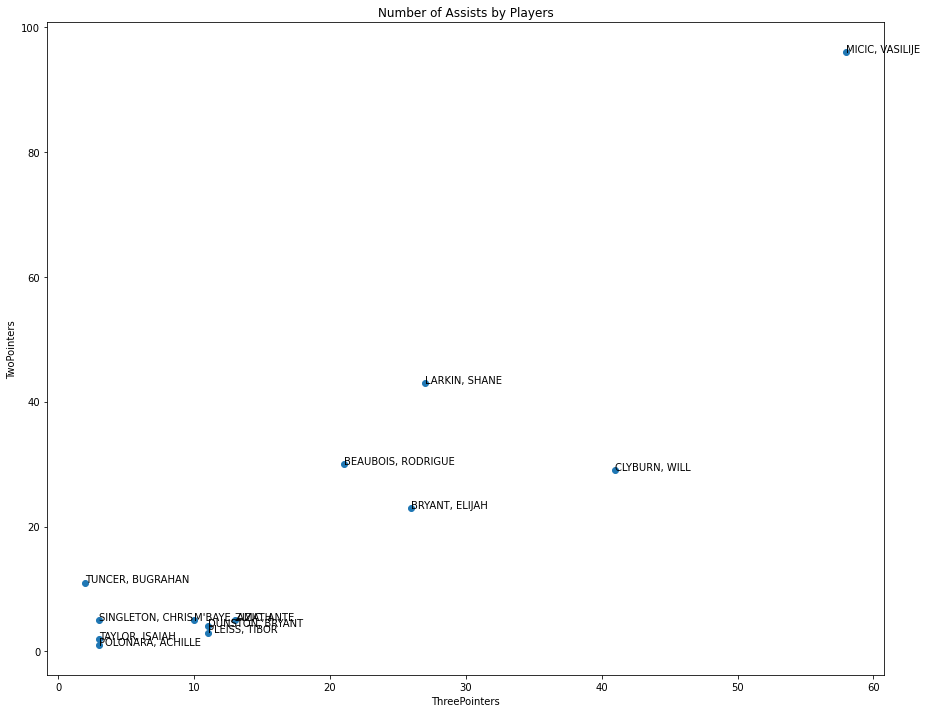

In [30]:
plt.figure(figsize=(15, 12))
plt.scatter(efesPlayersShotsFigure['ThreePointers'], efesPlayersShotsFigure['TwoPointers'])

# Add player names as labels
for i, player in enumerate(efesPlayersShotsFigure['Assister']):
    plt.annotate(player, (efesPlayersShotsFigure['ThreePointers'][i], efesPlayersShotsFigure['TwoPointers'][i]))

# Set labels and title
plt.xlabel('ThreePointers')
plt.ylabel('TwoPointers')
plt.title('Number of Assists by Players')

In [38]:
efesAssistCounts = assistCounts[assistCounts['CODETEAM_SHOT']=="IST"]
topEfesAssists = efesAssistCounts.sort_values(by='COUNT',ascending=False).head(10)
topEfesAssists.drop(columns ='CODETEAM_SHOT',inplace=True)
topEfesAssists.rename(columns = {'PLAYER_SHOT':'Shooter','PLAYER_ASSİST':'Assister','COUNT':'Assists'},inplace = True)
topEfesAssists.sort_values(by='Assists',ascending = False)

,Shooter,Assister,Assists
402,"CLYBURN, WILL","MICIC, VASILIJE",29
1761,"PLEISS, TIBOR","MICIC, VASILIJE",27
2396,"ZIZIC, ANTE","MICIC, VASILIJE",25
136,"BEAUBOIS, RODRIGUE","MICIC, VASILIJE",22
1320,"M'BAYE, AMATH","MICIC, VASILIJE",21
1759,"PLEISS, TIBOR","LARKIN, SHANE",20
2392,"ZIZIC, ANTE","BEAUBOIS, RODRIGUE",14
132,"BEAUBOIS, RODRIGUE","CLYBURN, WILL",14
1317,"M'BAYE, AMATH","CLYBURN, WILL",14
612,"DUNSTON, BRYANT","MICIC, VASILIJE",13


In [ ]:
efesAssistCounts

In [ ]:
efesAssistCounts.drop(columns='CODETEAM_SHOT',inplace = True)
efesAssistCounts.rename(columns = {'PLAYER_SHOT':'Shooter','PLAYER_ASSİST':'Assister'}, inplace = True)

In [ ]:
# Create a pivot table to reshape the data
pivot_table = efesAssistCounts.pivot_table(index='Shooter', columns='Assister', values='COUNT')

# Create the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [ ]:
#assistsWithPlayers.to_csv('assistsWithPlayers.csv')

In [ ]:
#shotsMade.to_csv('assists.csv')